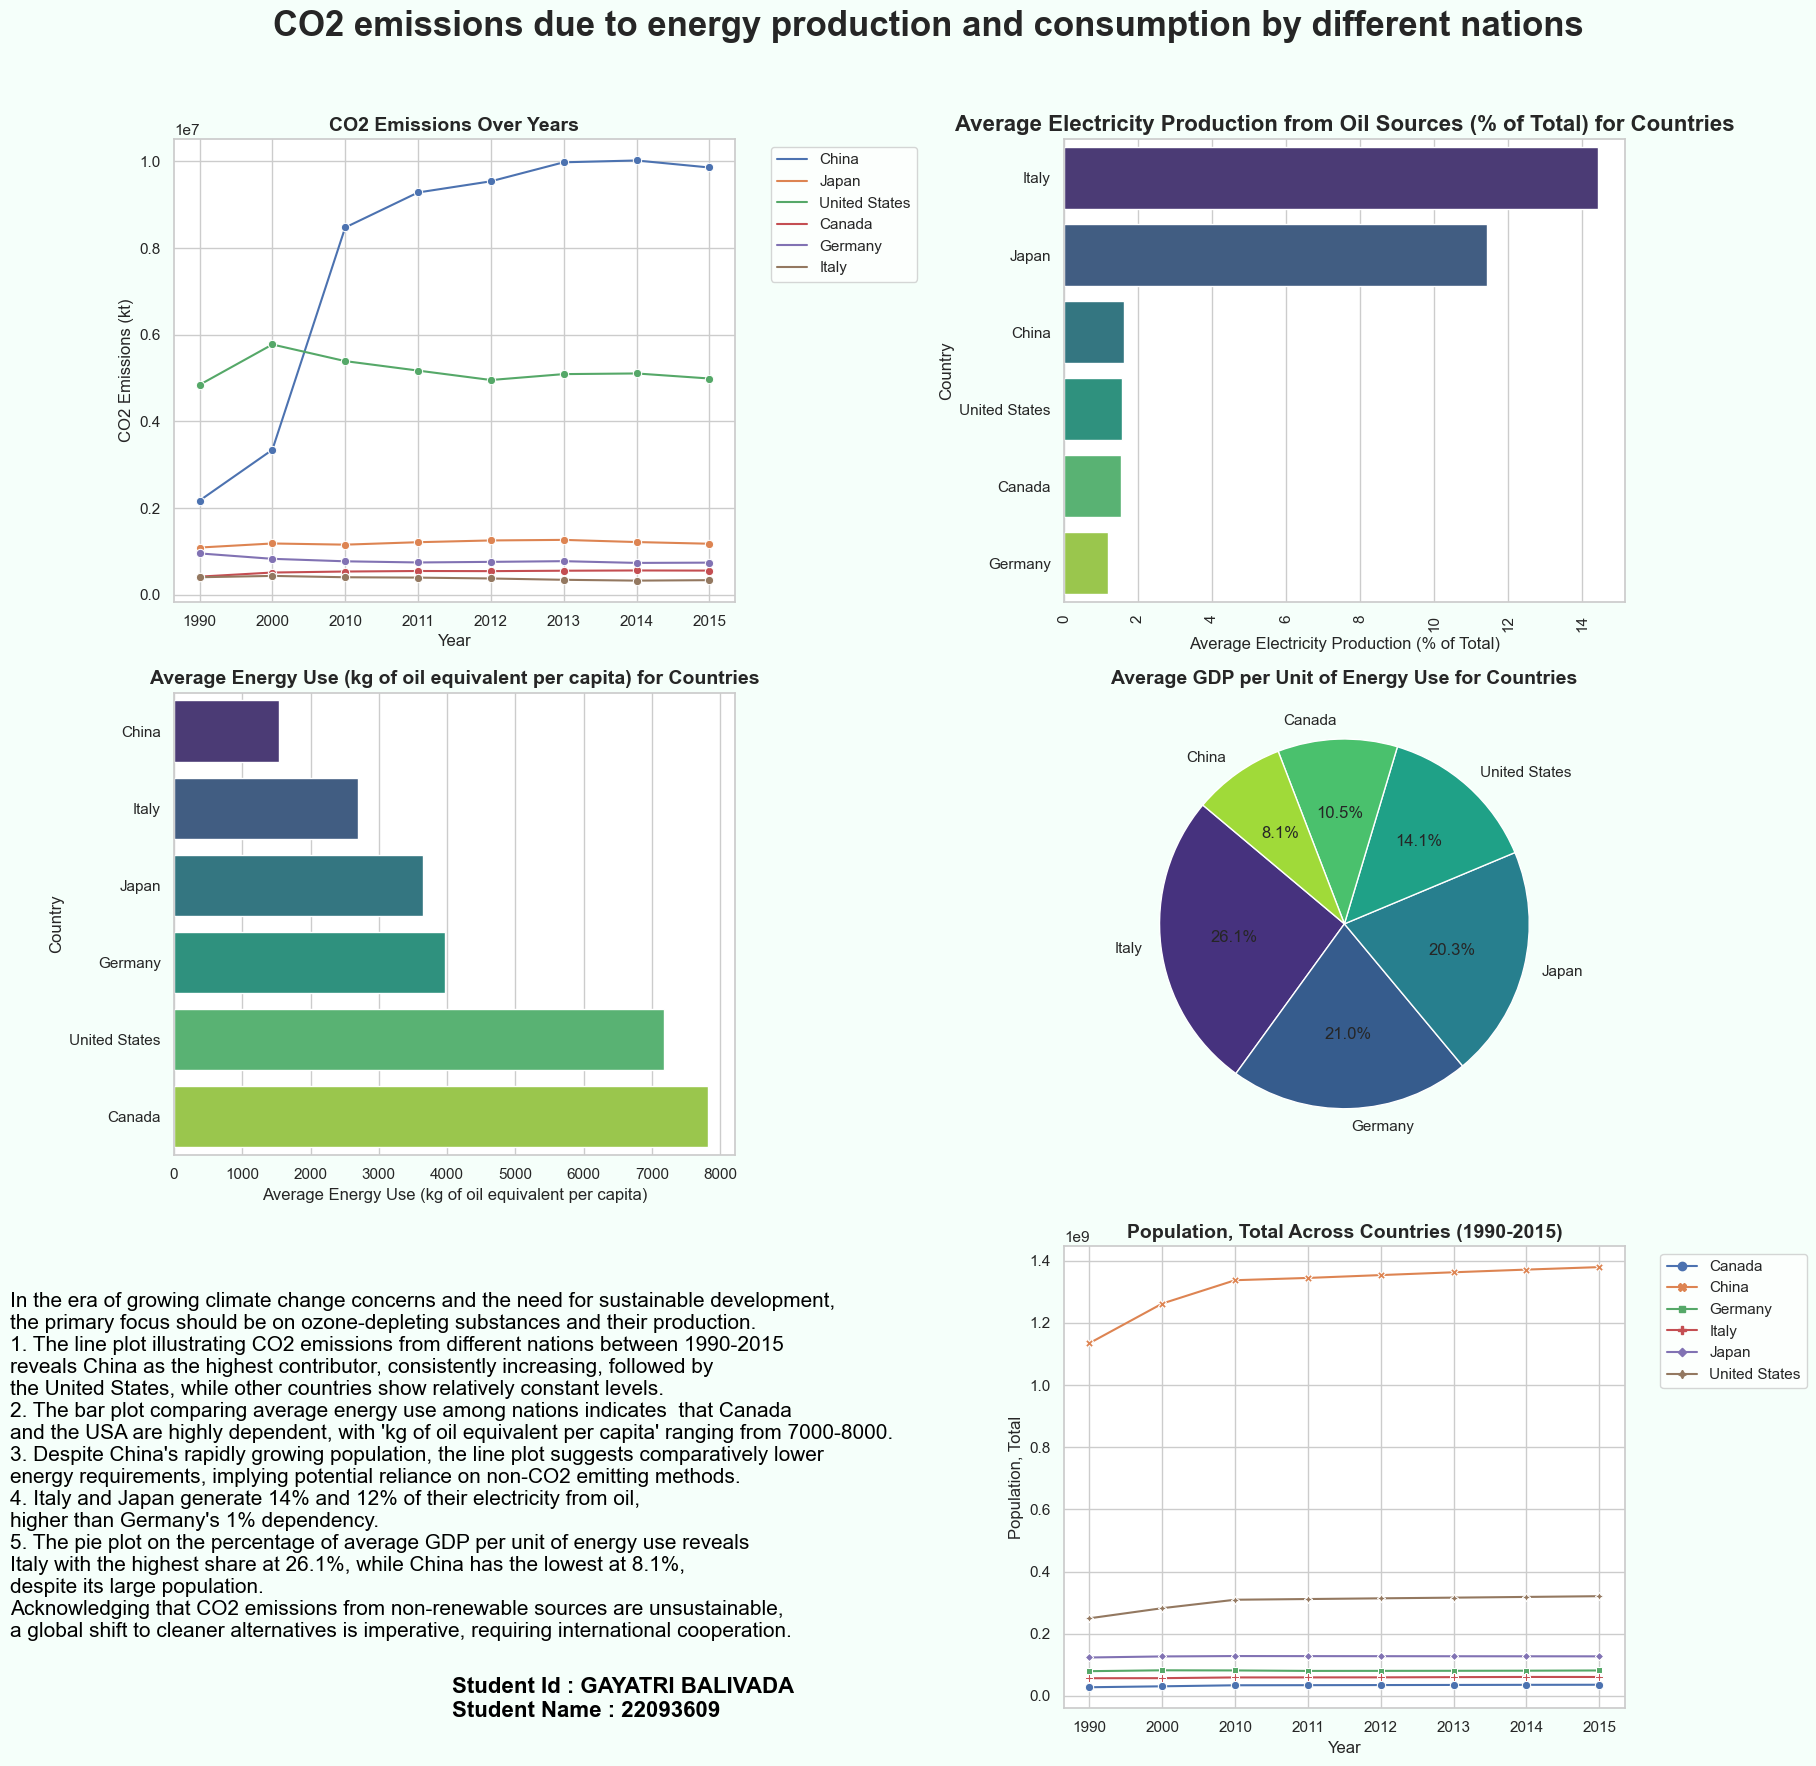

In [2]:
#Infographics Project
#Data source link : #https://databank.worldbank.org/source/world-development-indicators
#Github Link : #https://github.com/Gayatribalivada/Data-Handling-and-Visualisation_project.git
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read the CSV file
df = pd.read_csv("World_Bank_Indicators_gayatri.csv")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18),facecolor="mintcream")

# Add a title to the dashboard
fig.suptitle('CO2 emissions due to energy production and consumption by different nations', fontsize=25,fontweight='bold')

# Plot 1: CO2 Emissions Over Years
sns.lineplot(data=df, x='Year', y='CO2 emissions (kt)', hue='Country Name', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('CO2 Emissions Over Years',fontweight='bold',fontsize=14)
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('CO2 Emissions (kt)')
axes[0, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Average Electricity Production from Oil Sources (% of Total)
electricity_data = df[['Country Name', 'Electricity production from oil sources (% of total)', 'Year']]
# Group by 'Country Name' to calculate the average electricity production from oil sources for each country
average_electricity_data = electricity_data.groupby('Country Name')['Electricity production from oil sources (% of total)'].mean().reset_index()
# Sort the data by average electricity production in descending order for better visualization
average_electricity_data = average_electricity_data.sort_values(by='Electricity production from oil sources (% of total)', ascending=False)
sns.barplot(x='Electricity production from oil sources (% of total)', y='Country Name', data=average_electricity_data, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Average Electricity Production from Oil Sources (% of Total) for Countries',fontweight='bold',fontsize=16)
axes[0, 1].set_xlabel('Average Electricity Production (% of Total)')
axes[0, 1].set_ylabel('Country')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot 3: Average Energy Use (kg of oil equivalent per capita)
energy_use_data = df[['Country Name', 'Energy use (kg of oil equivalent per capita)', 'Year']]
# Group by 'Country Name' to calculate the average energy use (kg of oil equivalent per capita) for each country
average_energy_use_data = energy_use_data.groupby('Country Name')['Energy use (kg of oil equivalent per capita)'].mean().reset_index()
# Sort the data by average energy use in ascending order for better visualization
average_energy_use_data = average_energy_use_data.sort_values(by='Energy use (kg of oil equivalent per capita)')
sns.barplot(x='Energy use (kg of oil equivalent per capita)', y='Country Name', data=average_energy_use_data, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Average Energy Use (kg of oil equivalent per capita) for Countries',fontweight='bold',fontsize=14)
axes[1, 0].set_xlabel('Average Energy Use (kg of oil equivalent per capita)')
axes[1, 0].set_ylabel('Country')

# Plot 4: Average GDP per Unit of Energy Use (Pie Chart)
gdp_energy_data = df[['Country Name', 'GDP per unit of energy use (PPP $ per kg of oil equivalent)', 'Year']]
average_gdp_energy_data = gdp_energy_data.groupby('Country Name')['GDP per unit of energy use (PPP $ per kg of oil equivalent)'].mean().reset_index()
average_gdp_energy_data = average_gdp_energy_data.sort_values(by='GDP per unit of energy use (PPP $ per kg of oil equivalent)', ascending=False)
sns.set(style="whitegrid")
axes[1, 1].pie(average_gdp_energy_data['GDP per unit of energy use (PPP $ per kg of oil equivalent)'], labels=average_gdp_energy_data['Country Name'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', n_colors=len(average_gdp_energy_data)))
axes[1, 1].set_title('Average GDP per Unit of Energy Use for Countries',fontweight='bold',fontsize=14)

# Plot 5: Population, Total Across Countries (1990-2015)
population_data = df[['Country Name', 'Population, total', 'Year']]
population_data = population_data.groupby(['Country Name', 'Year'])['Population, total'].sum().reset_index()
population_pivot = population_data.pivot(index='Year', columns='Country Name', values='Population, total')
sns.lineplot(data=population_pivot, dashes=False, markers=True, ax=axes[2, 1])
axes[2, 1].set_title('Population, Total Across Countries (1990-2015)',fontweight='bold',fontsize=14)
axes[2, 1].set_xlabel('Year')
axes[2, 1].set_ylabel('Population, Total')
axes[2, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

textA = "In the era of growing climate change concerns and the need for sustainable development, \n" \
        "the primary focus should be on ozone-depleting substances and their production.\n" \
        "1. The line plot illustrating CO2 emissions from different nations between 1990-2015\n" \
        "reveals China as the highest contributor, consistently increasing, followed by \n" \
        "the United States, while other countries show relatively constant levels.\n" \
        "2. The bar plot comparing average energy use among nations indicates  that Canada \n" \
        "and the USA are highly dependent, with 'kg of oil equivalent per capita' ranging from 7000-8000. \n" \
        "3. Despite China's rapidly growing population, the line plot suggests comparatively lower \n" \
        "energy requirements, implying potential reliance on non-CO2 emitting methods.\n" \
        "4. Italy and Japan generate 14% and 12% of their electricity from oil,\n" \
        "higher than Germany's 1% dependency.\n" \
        "5. The pie plot on the percentage of average GDP per unit of energy use reveals \n" \
        "Italy with the highest share at 26.1%, while China has the lowest at 8.1%,\n" \
        "despite its large population.\n" \
        "Acknowledging that CO2 emissions from non-renewable sources are unsustainable,\n" \
        "a global shift to cleaner alternatives is imperative, requiring international cooperation.\n" 
        

#Data Description Text with Background
axes[2, 0].text(0.5, 0.5, textA, ha='center', va='center', fontsize=15, color='black', multialignment='left')
axes[2, 0].axis('off')  # Turn off axis for the text subplot

textB = "Student Id : GAYATRI BALIVADA\n" \
        "Student Name : 22093609"
axes[2, 0].text(0.8, 0.02, textB, ha='center', va='center', fontsize=16, color='black', multialignment='left', fontweight='bold')
axes[2, 0].axis('off') 


# Adjust layout
plt.tight_layout(rect=[0,0,1,0.96])

# Show the plots
plt.show()
